# 알고리즘 5.9 예제

### 1) 문제 정의
이 문제에서는 2차원 평면상에 주어진 점들 중 가장 가까운 두 점의 쌍을 찾는 것이 목적입니다. 이 문제는 컴퓨터 그래픽스, 물리 시뮬레이션, 데이터 클러스터링 등 다양한 분야에서 응용됩니다.

### 2) 알고리즘 설명
이 알고리즘은 분할 정복 방법을 사용하여 최근접 점 쌍을 찾습니다. 주어진 점들을 x좌표 기준으로 정렬한 후, 배열을 두 개의 동등한 부분으로 나누고, 각 부분에서 재귀적으로 최근접 쌍을 찾습니다. 그리고 경계에 걸쳐 있는 점들 사이에서도 최근접 쌍을 찾아 최소 거리를 결정합니다.


### 3) 손으로 푼 예제
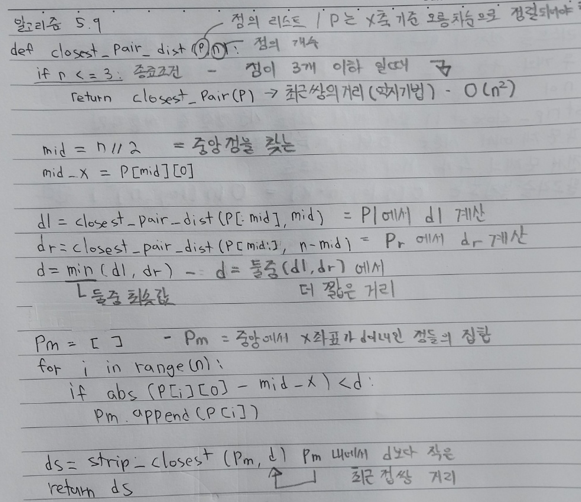

### 4) 코드 개요
- **입력 변수**:
  - `P`: 점들의 리스트, 각 점은 (x, y) 튜플 형태입니다.
  - `n`: 점의 개수, `P`의 길이.
- **출력**: 리스트 `P`에 있는 점들 중 가장 가까운 두 점 사이의 거리. / ds
- **함수 설명**: 
  - `closest_pair_dist` 함수는 점들의 리스트와 리스트의 길이를 입력으로 받아 최근접 쌍의 거리를 반환합니다.
  - `strip_closest` 함수는 P의 모든 점을 따라 오름차순으로 정렬하여 띠 영역 내에서 d보다 작은 최근접 쌍의 거리를 반환한다.
  - `closest_pair` 억지기법으로 최근접 쌍의 거리를 반환한다. ( 이 알고리즘에서는 점이 3개 이하 일때 처리한다.) 
  - `distance` 함수는 두 점 사이의 거리를 계산하는 유클리드 거리이다.

### 5) 코드 (Python)

아래의 코드에서 closest_pair_dist 함수를 테스트하기 위해서, 우선 closest_pair와 strip_closest 함수의 정의가 필요합니다. 여기서 closest_pair 함수는 주어진 점 집합에서 모든 가능한 점 쌍의 거리를 계산하여 가장 가까운 거리를 찾는 함수이며, strip_closest 함수는 특정 폭(d) 내에서 최소 거리를 찾습니다. 이 함수들은 작은 점 집합 또는 띠 영역 내에서 최소 거리를 계산하는 데 사용됩니다.

In [4]:
# 최근접 쌍의 거리
def closest_pair(P):
    min_dist = float('inf')
    n = len(P)
    for i in range(n):
        for j in range(i + 1, n):
            min_dist = min(min_dist, distance(P[i], P[j]))
    return min_dist

def closest_pair_dist(P, n):
    if n <= 3:
        return closest_pair(P)
    mid = n // 2
    mid_x = P[mid][0]

    dl = closest_pair_dist(P[:mid], mid)
    dr = closest_pair_dist(P[mid:], n-mid)
    d = min(dl, dr)

    Pm = []
    for i in range(n):
        if abs(P[i][0] - mid_x ) < d:
            Pm.append((P[i]))

    ds = strip_closest(Pm, d)
    return ds

def strip_closest(P, d):
    min_dist = d
    P.sort(key=lambda point: point[1])  # y축을 따라 정렬
    n = len(P)
    for i in range(n):
        for j in range(i + 1, n):
            if P[j][1] - P[i][1] >= min_dist:
                break
            min_dist = min(min_dist, distance(P[i], P[j]))
    return min_dist

def distance(p1, p2):
    return ((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2) ** 0.5


### 6) 테스트 코드

아래 코드는 closest_pair_dist 함수를 테스트하기 위해 무작위 점 집합을 생성하고 함수를 호출합니다. 이 예제에서는 점들을 x좌표에 따라 정렬한 다음 함수를 실행합니다.

In [3]:
import random

# 무작위 점 생성 함수
def generate_random_points(num_points):
    return [(random.randint(1, 100), random.randint(1, 100)) for _ in range(num_points)]

# 테스트 코드
num_points = 10  # 테스트할 점의 수
points = generate_random_points(num_points)
points.sort(key=lambda x: x[0])  # x좌표에 따라 점들을 정렬

closest_distance = closest_pair_dist(points, len(points))
print(f"The closest pair distance is: {closest_distance:.2f}")


The closest pair distance is: 4.47


### 7) 수행 결과
generate_random_points: 지정된 수의 점을 무작위로 생성하는 함수입니다. 각 점은 (x, y) 형식의 튜플로, x와 y 값은 1에서 100 사이의 정수입니다.

테스트 실행: 생성된 점들을 x좌표로 정렬한 후 closest_pair_dist 함수를 호출하여 최근접 점 쌍의 거리를 계산하고 출력합니다.

### 8) 복잡도 분석
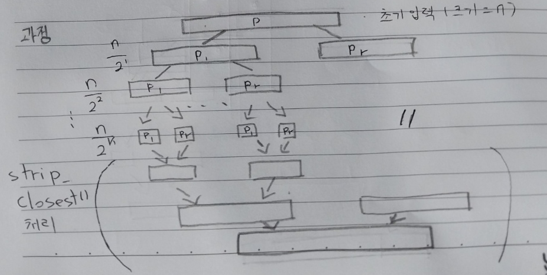

이 알고리즘은 리스트를 정확히 반으로 분할 한다. 입력 리스트 P는 진행 될수록 두 개의 부분 리스트 Pl Pr로 반복적으로 분할 된다. n이 2의 거듭제곱 n = 2^k 라고 가정하고 strip_closest()에서 Y좌표 기준으로 정렬을 하면 각 단계에서 시간은 O(n log2 n )이 되고 전체 단계의 수가 k에 비례하므로 알고리즘 복잡도는 O ( n log2 n * k) = O(n (log2 n)^2) 된다. 


### 9) 협력 내용
팀원들과 피드백과 협력하여 문제를 해결 했습니다.